# Perceptron

* Idea: Driven by mistakes

* Model:

\begin{align}
f(x)=sign(w^Tx+b),\\x{\in}R^p,w{\in}R^p\\\\
sign(a) = \left\{\begin{matrix}
+1,a\geqslant0
\\ 
-1,a<0
\end{matrix}\right.
\end{align}

* Loss funtion:

    1. Use the number of missclassification as loss
 
 \begin{align}
L(w)=\sum_{i=1}^{N}I\left \{y_i(w^Tx_i+b)<0\right \}\\
\left.\begin{matrix}
w^Tx_i+b>0,y_i>0
\\ 
w^Tx_i+b<0,y_i<0
\end{matrix}\right\}\Rightarrow \left\{\begin{matrix}
w^Tx_i+b>0, True
\\ 
w^Tx_i+b<0, False
\end{matrix}\right.
\end{align}

    **But in this case, the funtion is not derivative.**
    
    2. Use the distance as loss
  
 \begin{align}
min:L(w)=\sum_{x_i{\in}D}^{}-y_i(w^Tx_i+b)\\D:\left \{ Miss\ Classified\ Points\right \}\\
\Delta _{w}L = \sum_{}^{} -y_ix_i\\
\Delta _{b}L = \sum_{}^{} -y_i
\end{align}

* Algorithm: **SGD**

 \begin{align}
w^{(t+1)}=w^{(t)}-\lambda\Delta _{w}L \\
=w^{(t)} + \lambda\sum_{}^{} y_ix_i\\\\
b^{(t+1)}=b^{(t)}\lambda\Delta _{b}L \\
=b^{(t)} + \lambda\sum_{}^{} y_i
\end{align}

    b could be treated as w0

In [1150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
%matplotlib inline

In [1233]:
class Perceptron():
    """
    Perceptron Classifier.
    
    Parameters
    ------------------
    learning_rate: float
        Learning rate between 0.0 and 1.0
    max_iter: int
        Passes (epochs) over the training set
    n_sgd: int (Not Using)
        The number of gradient for stochastic gradient descent.
    
    Attributes
    ------------------
    
    
    """
    
    def __init__(self,active_func = 'step',n_sgd=5,max_iter=100,learning_rate=0.01):

        self.learning_rate= 0.01
        self.max_iter = 100 
        self.active_func = active_func
        if self.active_func == 'sigmoid':
            self.active_function = self._sigmoid_func
        elif self.active_func == 'step':
            self.active_function = self._unit_step_func
        self.n_sgd = 10

        
    def fit(self,X_train,y_train,verbose= True):
        """
        Fit method for training data.
        
        Parameters:
        -----------------------
        X_train: {array-like}, shape = [n_samples, n_features]
            Training matrix, where 'n_samples' is the number of samples 
            and 'n_features' is the number of features
        y_train: {array-like}, shape = [n_samples]
            Target labels
        
        Attributes:
        -----------------------
        w_record_: list
            Record all w.
        error_rate_: list
            Record all missclassification rate.
        intercept_: float
            Stores the intercept b.
        coef_: list
            Stores the w    
        
        Returns:
        ------------------------
        self: object
        
        """
        m, n = np.shape(X_train)
        # Add a column with 1s to replace b.
        X_train = np.column_stack((np.ones(m),X_train))
        # Since y = {+1,-1}, convert all zeros to negative
        
        # Add a extra for b.
        self.w = np.zeros(n+1)
        
        self.w_record_ = []
        self.error_rate_ = []
        
        for _ in range(self.max_iter):
            incorrect_points = np.where(np.multiply(y_train,self.sign(X_train).reshape(m,1)) <= 0)[0]
            c = len(incorrect_points) / float(m)
            self.error_rate_.append(c)
            for i in range(m):
                y_pred = self.sign(X_train[i])
                #print(y_pred)
                if y_train[i]*y_pred <= 0:
                    self.w += (self.learning_rate * X_train[i]*y_train[i]).T
                    self.w_record_.append(self.w.copy())
                    
        self.intercept_ = self.w[0]
        self.coef_ = self.w[1:]
        
        #SGD
#             y_pred = self.predict(X_train,self.w).reshape(m,1)

#             incorrect_points = np.where(np.multiply(y_train,y_pred) <= 0)[0]
            
#             if len(incorrect_points) == 0:
#                 break
#             c = len(incorrect_points) / float(m)
#             self.error_rate_.append(c)
            
# #             ls_i = np.random.choice(incorrect_points,self.n_sgd)
# #             for i in ls_i:
# #                 self.w += (self.learning_rate * X_train[i]*y_train[i]).T
#             i = np.random.choice(incorrect_points)
#             self.w += (self.learning_rate * X_train[i]*y_train[i]).T
#             self.w_record_.append(self.w.copy())

    
    def sign(self,X):
        
        linear_output = np.dot(X,self.w)
        prediction = self.active_function(linear_output)
    
        return prediction
    
    def predict(self,X):
        m, n = np.shape(X)
        # Add a column with 1s to replace b.
        X = np.column_stack((np.ones(m),X))
        linear_output = np.dot(X,self.w)
        prediction = self.active_function(linear_output)
        return prediction
    
    
    def _unit_step_func(self, x):
        return np.where(x>0 ,1,-1)
    
    def _sigmoid_func(self,z):
        a = 1/(1+np.exp(-z))
        return np.where(a>0.5,1,-1)
        


In [1234]:
from sklearn import datasets
df = pd.read_csv('ex.csv')

df = df[df['target']!=2]
df['target'][df['target']==0]=-1
X_train,X_test,y_train,y_test = train_test_split(df.drop('target',axis=1),df['target'].to_frame(),test_size = 0.3,random_state=101)
# feature = df.drop('target',axis=1)
# target = df['target'].to_frame()
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()


/Users/qijin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [1235]:
p = Perceptron()
p.fit(X_train,y_train)

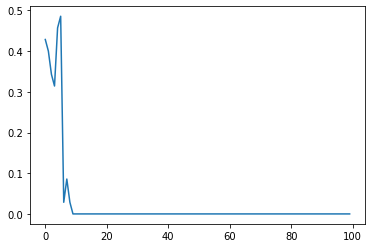

In [1236]:
plt.plot(p.error_rate_)

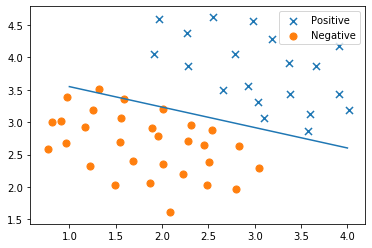

In [1237]:


x = np.linspace(1,4)
y = (-p.w[0] - p.w[1]*x)/p.w[2]

positive = df[df['target'].isin([1])]
negative = df[df['target'].isin([-1])]

fig, ax = plt.subplots()
ax.scatter(positive['f1'], positive['f2'], s=50, marker='x', label='Positive')
ax.scatter(negative['f1'], negative['f2'], s=50, marker='o', label='Negative')
ax.plot(x,y)
ax.legend()
plt.show()




In [1238]:
y_pred = p.predict(X_test)


In [1239]:
from sklearn.metrics import confusion_matrix

In [1240]:
confusion_matrix(y_test,y_pred)

array([[9, 1],
       [0, 5]])